In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# reading the data into a dataframe
df = pd.read_excel('/content/selected correlation data.xlsx')
df.head(5)

,DATE_TIME,HOUSE_PIC 1,INTERVIEW_LANG 1,INFO_RECIEVING 1,COMMUNICATION_WAY 1,LEADER_PARTICIPATION 1,COMMU_ORG 1,AVG_MON_SAL,HOUSE_HEAD 1,NO_HOUSEHOLD,CHANG_ECO_SITUA 1,ACC_STATUS 1,EDU_LEVEL 1,PARTICIPANT_JOB 1,SELF_BUILT_HOUSE 1,VEGES 1,FLOOD_EXP 1,YRLY_FLOOD,FIRE_EXP 1,WATER_SATISFIED 1,TOILET_TYPE 1,WATER_SOURCE 1
0,2022-11-14T17:05:35,1.0,1,2.0,1,0,0.0,NaN,5,2,4.0,1,5.0,3,0.0,0,0,NaN,0.0,NaN,1.0,1
1,2022-11-14T16:52:00,1.0,1,1.0,1,0,0.0,1000,2,2,5.0,1,4.0,3,1.0,0,0,NaN,1.0,0.0,NaN,1
2,2022-11-14T16:26:14,1.0,1,5.0,6,0,0.0,<500,2,3,3.0,1,4.0,3,1.0,0,1,2.0,1.0,NaN,4.0,1
3,2022-11-12T13:58:47,1.0,1,5.0,6,0,0.0,<500,8,2,2.0,2,4.0,3,0.0,0,0,NaN,1.0,0.0,4.0,1
4,2022-11-09T10:14:33,1.0,1,1.0,1,0,0.0,3500,2,3,4.0,1,4.0,4,0.0,0,0,NaN,1.0,0.0,2.0,1


In [ ]:
# Get some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE_TIME               156 non-null    object 
 1   HOUSE_PIC 1             155 non-null    float64
 2   INTERVIEW_LANG 1        156 non-null    int64  
 3   INFO_RECIEVING 1        155 non-null    float64
 4   COMMUNICATION_WAY 1     156 non-null    int64  
 5   LEADER_PARTICIPATION 1  156 non-null    int64  
 6   COMMU_ORG 1             153 non-null    float64
 7   AVG_MON_SAL             155 non-null    object 
 8   HOUSE_HEAD 1            156 non-null    int64  
 9   NO_HOUSEHOLD            156 non-null    int64  
 10  CHANG_ECO_SITUA 1       155 non-null    float64
 11  ACC_STATUS 1            156 non-null    int64  
 12  EDU_LEVEL 1             155 non-null    float64
 13  PARTICIPANT_JOB 1       156 non-null    int64  
 14  SELF_BUILT_HOUSE 1      153 non-null    fl

In [ ]:
df.describe()

,HOUSE_PIC 1,INTERVIEW_LANG 1,INFO_RECIEVING 1,COMMUNICATION_WAY 1,LEADER_PARTICIPATION 1,COMMU_ORG 1,HOUSE_HEAD 1,NO_HOUSEHOLD,CHANG_ECO_SITUA 1,ACC_STATUS 1,EDU_LEVEL 1,PARTICIPANT_JOB 1,SELF_BUILT_HOUSE 1,VEGES 1,FLOOD_EXP 1,YRLY_FLOOD,FIRE_EXP 1,WATER_SATISFIED 1,TOILET_TYPE 1,WATER_SOURCE 1
count,155.000000,156.000000,155.000000,156.000000,156.000000,153.000000,156.000000,156.000000,155.000000,156.000000,155.000000,156.000000,153.000000,156.000000,156.000000,82.000000,155.000000,125.000000,120.000000,156.000000
mean,0.864516,0.461538,2.180645,2.647436,0.089744,5.666667,4.032051,3.012821,3.767742,1.121795,3.877419,2.974359,0.405229,0.096154,0.551282,201.012195,0.735484,0.608000,2.358333,1.019231
std,0.343349,0.500124,1.539400,2.236946,0.286735,2.486807,2.092752,1.677122,0.691501,0.328102,0.501109,0.810804,0.492549,0.295752,0.498965,602.123413,0.442505,0.490161,0.857942,0.178566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000
50%,1.000000,0.000000,2.000000,1.000000,0.000000,7.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,3.000000,6.000000,0.000000,7.000000,5.000000,4.000000,4.000000,1.000000,4.000000,3.000000,1.000000,0.000000,1.000000,5.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,5.000000,6.000000,1.000000,10.000000,9.000000,10.000000,5.000000,2.000000,5.000000,4.000000,1.000000,1.000000,1.000000,2022.000000,1.000000,1.000000,4.000000,3.000000


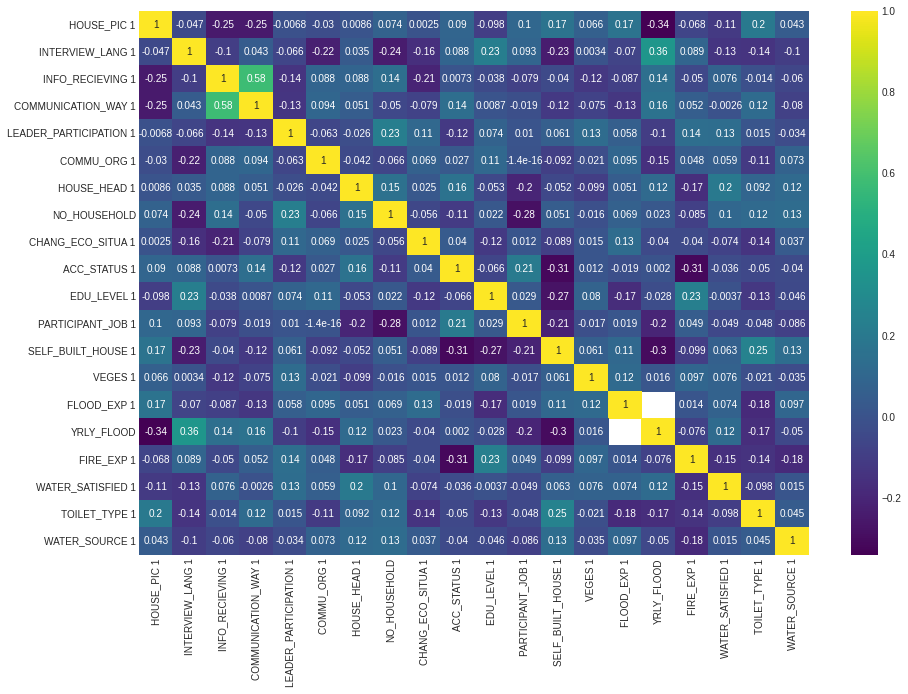

In [ ]:


fig= plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

